In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

Load LLM Model

In [7]:
from langchain_groq import ChatGroq

In [8]:
model_name = "deepseek-r1-distill-llama-70b"

In [9]:
llm = ChatGroq(model_name = model_name)

In [10]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 4, 'total_tokens': 18, 'completion_time': 0.081685272, 'prompt_time': 6.8269e-05, 'queue_time': 0.217946921, 'total_time': 0.081753541}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--c00a98ab-bf0b-4889-af00-c8e868db345a-0', usage_metadata={'input_tokens': 4, 'output_tokens': 14, 'total_tokens': 18})

In [12]:
print (llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [15]:
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [16]:
def call_llm(state: MessagesState):
    messages = state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}

In [19]:
state={"messages":["hi hello how are you?"]}
call_llm(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.204197574, 'prompt_time': 0.000199166, 'queue_time': 0.217990691, 'total_time': 0.20439674}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--ac1b7a6f-272d-4e91-b16e-8bdac12fdf9c-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

Simple Workflow without Tool calling

In [20]:
workflow1 = StateGraph(MessagesState)

In [21]:
workflow1.add_node("my_bot", call_llm)
workflow1.add_edge(START, "my_bot")
workflow1.add_edge("my_bot", END)

In [22]:
app1 = workflow1.compile()

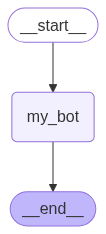

In [23]:
from IPython.display import Image, display
display(Image(app1.get_graph().draw_mermaid_png()))

In [24]:
input={"messages":["hi hello how are you?"]}

In [25]:
app1.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='b4b60972-3e17-41b7-9d04-299c23d2b361'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 9, 'total_tokens': 47, 'completion_time': 0.180170923, 'prompt_time': 0.000190776, 'queue_time': 0.22126034, 'total_time': 0.180361699}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e6782f2b-4a58-4ef9-bb17-22bd41233c5f-0', usage_metadata={'input_tokens': 9, 'output_tokens': 38, 'total_tokens': 47})]}

In [26]:
for output in app1.stream(input):
    for key, value in output.items():
        print(f"Output from {key} node")
        print ("_______________________________")
        print (value)
        print ("\n\n")

Output from my_bot node
_______________________________
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.664250449, 'prompt_time': 0.000482289, 'queue_time': 0.218557147, 'total_time': 0.664732738}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--9480892d-12b6-4905-9664-27730762ba12-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}





Workflow with Tool Calling

In [28]:
@tool
def my_tool(query:str):
    """This is My Tool for Getting Weather"""
    if "sudan" in query.lower():
        return "The Temp is 45 degrees and Sunny here"
    return "The Temp is 30 degrees and Cold here"

Testing Tool

In [29]:
my_tool.invoke("What is the weather in sudan ?")

'The Temp is 45 degrees and Sunny here'

In [30]:
my_tool.invoke("What is the weather in iran ?")

'The Temp is 30 degrees and Cold here'

In [31]:
my_tool

StructuredTool(name='my_tool', description='This is My Tool for Getting Weather', args_schema=<class 'langchain_core.utils.pydantic.my_tool'>, func=<function my_tool at 0x000001CCE61D2E60>)

In [35]:
my_tool

StructuredTool(name='my_tool', description='This is My Tool for Getting Weather', args_schema=<class 'langchain_core.utils.pydantic.my_tool'>, func=<function my_tool at 0x000001CCE61D2E60>)

In [39]:
llm.invoke("What is the weather in sudan ?")

AIMessage(content="<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Sudan generally has a tropical climate with two main seasons: a dry season and a rainy season. The country's climate varies by region:\n\n1. **North Sudan**: This region experiences a desert climate with very little rainfall, high temperatures during the day, and cooler nights.\n2. **Central Sudan**: This area has a mix of desert and savanna climates, with a short rainy season.\n3. **South Sudan**: The southern part of Sudan has a tropical savanna climate with a distinct rainy season and higher humidity.\n\nFor the most accurate and up-to-date weather information, I recommend checking a reliable weather forecasting service or app.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 152, 'prompt_tokens': 11, 'total_tokens': 163, 'completion_time': 0.553817506, 'prompt_time': 0.000292014, 'queue_time': 0.054029446, 'total_time':

Binding Tool to LLM

In [40]:
tools = [my_tool]

In [42]:
llm_with_tool = llm.bind_tools(tools)

In [50]:
response = llm_with_tool.invoke("What is the weather in sudan ?")

In [51]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hfnhdtxda', 'function': {'arguments': '{"query":"sudan"}', 'name': 'my_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 132, 'total_tokens': 283, 'completion_time': 0.641244063, 'prompt_time': 0.008478596, 'queue_time': 0.21839197999999999, 'total_time': 0.649722659}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--33ce016f-7d77-4050-b308-a7a6f520f6f4-0', tool_calls=[{'name': 'my_tool', 'args': {'query': 'sudan'}, 'id': 'hfnhdtxda', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 151, 'total_tokens': 283})

In [53]:
response.content

''

In [54]:
response.tool_calls

[{'name': 'my_tool',
  'args': {'query': 'sudan'},
  'id': 'hfnhdtxda',
  'type': 'tool_call'}]

In [55]:
def call_llm(state: MessagesState):
    question = state["messages"]
    response = llm_with_tool.invoke(question)
    return {"messages": [response]}

In [56]:
input={"messages":["What is the weather in sudan ?"]}

In [59]:
response = call_llm(input)

In [60]:
response["messages"][-1].content

''

In [61]:
response["messages"][-1].tool_calls

[{'name': 'my_tool',
  'args': {'query': 'weather in Sudan'},
  'id': 'aea5e781r',
  'type': 'tool_call'}]

Router Function

In [62]:
def router_function(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [63]:
tools

[StructuredTool(name='my_tool', description='This is My Tool for Getting Weather', args_schema=<class 'langchain_core.utils.pydantic.my_tool'>, func=<function my_tool at 0x000001CCE61D2E60>)]

In [64]:
tool_node=ToolNode(tools)

In [65]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'my_tool': StructuredTool(name='my_tool', description='This is My Tool for Getting Weather', args_schema=<class 'langchain_core.utils.pydantic.my_tool'>, func=<function my_tool at 0x000001CCE61D2E60>)}, tool_to_state_args={'my_tool': {}}, tool_to_store_arg={'my_tool': None}, handle_tool_errors=True, messages_key='messages')

In [66]:
workflow2 = StateGraph(MessagesState)

In [67]:
workflow2.add_node("llmwithtool", call_llm)
workflow2.add_node("mytools", tool_node)

workflow2.add_edge(START, "llmwithtool")
workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {
                                    "tools": "mytools",
                                    END: END
                                })

In [68]:
app2 = workflow2.compile()

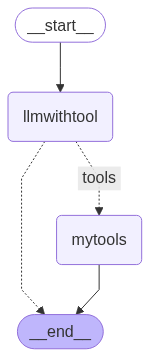

In [69]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [79]:
input={"messages":["What is the weather in sudan ?"]}
response = app2.invoke(input)

response

{'messages': [HumanMessage(content='What is the weather in sudan ?', additional_kwargs={}, response_metadata={}, id='18f94f82-8f70-45c4-b2bc-7936555bb1d8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4t29azpq6', 'function': {'arguments': '{"query":"sudan"}', 'name': 'my_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 231, 'prompt_tokens': 132, 'total_tokens': 363, 'completion_time': 0.994544374, 'prompt_time': 0.008578425, 'queue_time': 0.217817446, 'total_time': 1.003122799}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9dc6103f-48af-40b1-b759-fcc4b23b33a3-0', tool_calls=[{'name': 'my_tool', 'args': {'query': 'sudan'}, 'id': '4t29azpq6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 231, 'total_tokens': 363}),
  ToolMessage(content='The Temp is 45 degrees and Sunny here', name='my_tool', id='dab

In [80]:
input={"messages":["What is the weather in iran ?"]}
response = app2.invoke(input)

response

{'messages': [HumanMessage(content='What is the weather in iran ?', additional_kwargs={}, response_metadata={}, id='f358af26-c66d-426f-a5f9-6a099aed7c1d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k142d8yj8', 'function': {'arguments': '{"query":"iran"}', 'name': 'my_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 156, 'prompt_tokens': 132, 'total_tokens': 288, 'completion_time': 0.689263325, 'prompt_time': 0.008447277, 'queue_time': 0.21768868, 'total_time': 0.697710602}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e3c3be24-2b06-4c5c-9faa-c21364f6b9cc-0', tool_calls=[{'name': 'my_tool', 'args': {'query': 'iran'}, 'id': 'k142d8yj8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 156, 'total_tokens': 288}),
  ToolMessage(content='The Temp is 30 degrees and Cold here', name='my_tool', id='cf6df1cf

In [81]:
input={"messages":["What is 2 +3 actually ?"]}
response = app2.invoke(input)

response

{'messages': [HumanMessage(content='What is 2 +3 actually ?', additional_kwargs={}, response_metadata={}, id='1f757374-754f-430c-89cf-45f521d295d3'),
  AIMessage(content="I'm unable to assist with that request.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 132, 'total_tokens': 249, 'completion_time': 0.646725124, 'prompt_time': 0.008588805, 'queue_time': 0.21788159499999998, 'total_time': 0.655313929}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--34a0a59d-2985-466d-8951-399819185a0c-0', usage_metadata={'input_tokens': 132, 'output_tokens': 117, 'total_tokens': 249})]}

In [82]:
workflow2.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [83]:
app3=workflow2.compile()

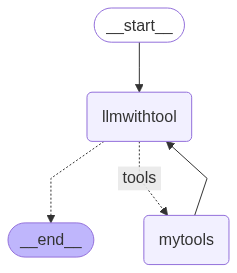

In [84]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [85]:
input={"messages":["What is the weather in sudan ?"]}
response = app3.invoke(input)

response

{'messages': [HumanMessage(content='What is the weather in sudan ?', additional_kwargs={}, response_metadata={}, id='2ecf892c-49a7-43cd-bc98-f7ca9156ac58'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2devvamy7', 'function': {'arguments': '{"query":"weather in Sudan"}', 'name': 'my_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 168, 'prompt_tokens': 132, 'total_tokens': 300, 'completion_time': 0.792657511, 'prompt_time': 0.008475757, 'queue_time': 0.24203780700000002, 'total_time': 0.801133268}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--25f73b31-5560-4655-bffb-c9f8cfd64486-0', tool_calls=[{'name': 'my_tool', 'args': {'query': 'weather in Sudan'}, 'id': '2devvamy7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 168, 'total_tokens': 300}),
  ToolMessage(content='The Temp is 45 degrees and Sunny 

In [86]:
input={"messages":["What is the weather in iran ?"]}
response = app3.invoke(input)

response

{'messages': [HumanMessage(content='What is the weather in iran ?', additional_kwargs={}, response_metadata={}, id='d7720d01-b105-4170-bc37-11177821928d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qp06myqez', 'function': {'arguments': '{"query":"iran"}', 'name': 'my_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 132, 'total_tokens': 279, 'completion_time': 0.716614996, 'prompt_time': 0.010083917, 'queue_time': 0.218763443, 'total_time': 0.726698913}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--69edef15-8fef-451a-b156-95d31125c37c-0', tool_calls=[{'name': 'my_tool', 'args': {'query': 'iran'}, 'id': 'qp06myqez', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 147, 'total_tokens': 279}),
  ToolMessage(content='The Temp is 30 degrees and Cold here', name='my_tool', id='493a5ca

In [87]:
input={"messages":["What is 2 +3 actually ?"]}
response = app3.invoke(input)

response

{'messages': [HumanMessage(content='What is 2 +3 actually ?', additional_kwargs={}, response_metadata={}, id='e119f241-094a-46bd-9c03-ff14a085a003'),
  AIMessage(content='The result of adding 2 and 3 is **5**.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 353, 'prompt_tokens': 132, 'total_tokens': 485, 'completion_time': 1.6473755730000001, 'prompt_time': 0.009148154, 'queue_time': 0.22243469600000002, 'total_time': 1.656523727}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--aae5e767-31f3-4ed9-b92c-c25c87d7da72-0', usage_metadata={'input_tokens': 132, 'output_tokens': 353, 'total_tokens': 485})]}

Memory Saver

In [111]:
from langgraph.checkpoint.memory import MemorySaver

In [112]:
memory=MemorySaver()

In [113]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool", call_llm)

workflow3.add_node("mytools", tool_node)

workflow3.add_edge(START, "llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {
                                    "tools":"mytools",
                                    END:END
                                })

workflow3.add_edge("mytools","llmwithtool")

In [114]:
app4=workflow3.compile(checkpointer=memory)

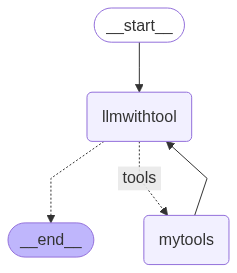

In [115]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [116]:
config={"configurable": {"thread_id": "1"}}

In [122]:
events=app4.stream(
    {"messages":["what is the weather in iran ?"]},config=config,stream_mode="values"
    )

In [123]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is the weather in iran ?
================================== Ai Message ==================================
Tool Calls:
  my_tool (xwce51drb)
 Call ID: xwce51drb
  Args:
    query: what is the weather in iran ?
================================= Tool Message =================================
Name: my_tool

The Temp is 30 degrees and Cold here
================================== Ai Message ==================================
Tool Calls:
  my_tool (yvxmtzpm1)
 Call ID: yvxmtzpm1
  Args:
    query: what is the weather in iran ?
================================= Tool Message =================================
Name: my_tool

The Temp is 30 degrees and Cold here
================================== Ai Message ==================================


In [124]:
config

{'configurable': {'thread_id': '1'}}

In [125]:
memory

In [132]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T13:13:42.053488+00:00',
 'id': '1f049216-4b0b-6067-8010-5ff760c1fcdc',
 'channel_versions': {'__start__': '00000000000000000000000000000017.0.2531632514926888',
  'messages': '00000000000000000000000000000018.0.020490186044201053',
  'branch:to:llmwithtool': '00000000000000000000000000000018.0.5032883974511229',
  'branch:to:mytools': '00000000000000000000000000000011.0.623513035826298'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000016.0.15467951976429328'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000017.0.058690820139505884'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000010.0.10986591966750081'}},
 'channel_values': {'messages': [HumanMessage(content='what is the weather in sudan ?', additional_kwargs={}, response_metadata={}, id='fd2127f2-2705-4555-8fdf-5c8fd738b52f'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xt17wd9xe', 'function

In [135]:
events=app4.stream(
    {"messages":["In which country the temp was 30 degree ?"]},config=config,stream_mode="values"
    )

In [136]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

In which country the temp was 30 degree ?
================================== Ai Message ==================================
Tool Calls:
  my_tool (jm4fj8f57)
 Call ID: jm4fj8f57
  Args:
    query: In which country the temp was 30 degree ?
================================= Tool Message =================================
Name: my_tool

The Temp is 30 degrees and Cold here
================================== Ai Message ==================================

The temperature of 30 degrees was recorded in **Iran**.
